### initial practice 

things to do
- maybe follow [this](https://programmerbackpack.com/python-knowledge-graph-understanding-semantic-relationships/) 
- implement a basic family network: bob is a cousin of larry, mary is a sister of larry, etc 



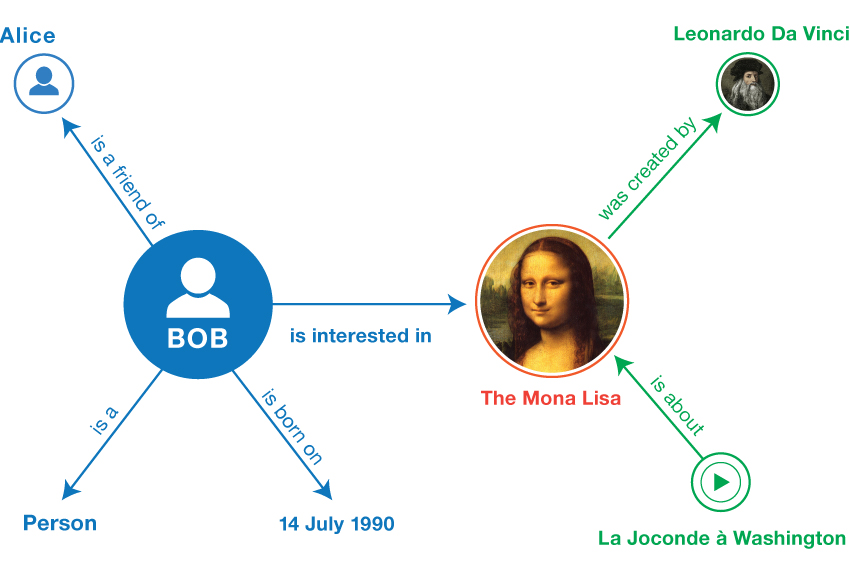 



### overview of tasks 

1. be able to represent knowledge graph data structure 
2. query from structure created in step 1 
3. extract unstructured data / information into graph form 

### task 1 

implement this 
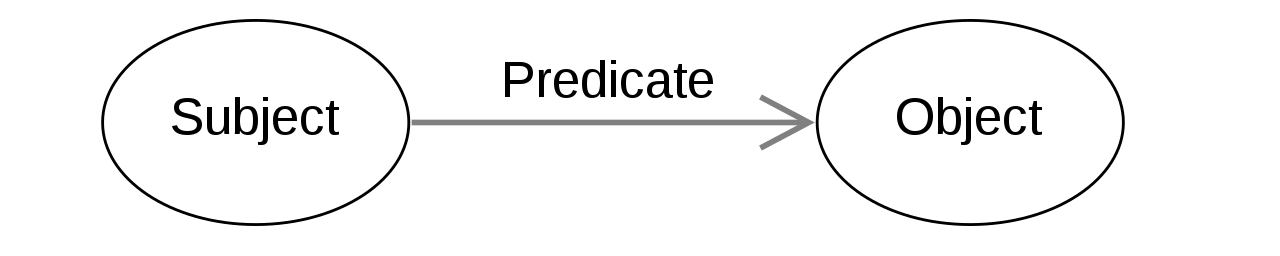


----- 

ideas / questions

- has to start with finite amount of predicates 
- can subjects and objects be the same?  
- how to link to one another? 
    - use hash of sentence --> link to hash 
    


- link nodes through hashes (like blockchain) 
    - nodes can be represented in dict format 


graph structure 
- list of nodes with pointers to each other 


method --> create node 
- contains subject, data, and unique** identifier 


method --> add node to graph 
- append node (dict) to graph (list) 




** https://en.wikipedia.org/wiki/Birthday_attack#Mathematics 

In [154]:
import hashlib 
import json
import random
import pandas as pd

In [82]:
1 / (2 **128)

2.938735877055719e-39

In [78]:
%timeit random.getrandbits(256)

154 ns ± 3.77 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [79]:
%timeit random.getrandbits(128)

117 ns ± 3.35 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [21]:
def getHash(s): 
    "works for strings"
    
    return hashlib.sha256(str(s).encode()).hexdigest()

In [54]:
class RDF: 
    
    def __init__(self): 
        self.graph = [] 
        self.triples = {
            'subjects': [], 
            'predicates': [], 
            'objects': []
        }
        
    def add_to_graph(self, subject, predicate, obj):  
        self.subject = subject 
        self.triples['subjects'].append(subject)
            
        self.predicate = predicate 
        self.triples['predicates'].append(predicate)
        
        self.obj = obj 
        self.triples['objects'].append(obj)
        
       
        
        
        sent = f"{self.subject} {self.predicate} {self.obj}" 
        elem = sent, getHash(sent)
        self.graph.append(elem) 

        

In [58]:
new = RDF()
new.add_to_graph('bob', 'is a cousin to', 'larry')
new.add_to_graph('larry', 'is a brother to', 'emily')



In [72]:
"""
nodes represented as dicts 
    - subject, data keys 
    - link to other through hash 
        - problem: hash of node will change if any information is added to node 
            - (maybe) solution: generate random str to assign to node 
                - needs to be apart of the node creation process 

methods / functions / classes 
    - create new node 
    - 
"""

bob_node = {
    'subject': 'bob', 
    'data': [{'cousin to': 'larry'}, {'son of': 'donald'}],  
    'hash': getHash(bob_node)
} 

larry_node = {
    'subject': 'larry', 
    'data': [{'occupation': 'plumber'}, {'cousin to': ('bob', bob_node['hash'])}], 
    'hash'
}

plumber_node = {
    'subject': 'plumbing', 
    'data': [{'instance of': 'occupation'}, 
    {'pay': '$40'}, 
    {'pay type': 'hourly'}], 
    'hash': getHash(plumber_node)
}

larry_node

{'subject': 'larry',
 'data': [{'occupation': 'plumber'},
  {'cousin to': ('bob',
    'c25055159d3fc6a2e040e4777091b47a98268babaa3926e53f45a8e69d45b4b6')}]}

In [205]:
class Node: 
    
    def __init__(self, data): 
        self.data = data 
        self.uid = random.getrandbits(128)
        self.node = {
            'data': data, 
            'uid': self.uid
        } 
    
    def alter(self, key, val): 
        "alter a nodes data"  
        
        if key != 'data': 
            self.node[key] = val 
        else: 
            # val should be a dict 
            assert type(val) == dict
            self.node['data'].update(val) 

class KnowledgeGraph: 
    
    def __init__(self): 
        self.graph = [] 
    
    def addNode(self, node, multiple=False):  
        if multiple: 
            # node should be a list
            self.graph.extend(node) 
        else:
            self.graph.append(node)

In [200]:
L = [4]
L.extend([1,2,3])
L

[4, 1, 2, 3]

In [131]:
bob = {
    'name': 'bob', 
    'instance of': 'human', 
    'cousin to': 'larry', # need larry's node here?
    'son of': 'donald'
} 

larry = {
    'name': 'larry', 
    'instance of': 'human', 
    'cousin to': 'bob', # need larry's node here?
    'son of': 'howard', 
    'occupation': 'plumber'
}

In [259]:
b = Node(bob)
l = Node(larry)
b.alter('data', {'occupation': 'teacher'})

l.alter('data', {'cousin to': b})
b.alter('data', {'cousin to': l})

In [260]:
b.node['data']

{'name': 'bob',
 'instance of': 'human',
 'cousin to': <__main__.Node at 0x7ffb40dd7760>,
 'son of': 'donald',
 'occupation': 'teacher'}

In [261]:
b

In [ ]:
'humans who are cousins to larry' 



In [148]:
graph = KnowledgeGraph()
graph.addNode(b)
graph.addNode(l)

In [149]:
[x.node for x in graph.graph]

[{'data': {'name': 'bob',
   'instance of': 'human',
   'cousin to': <__main__.Node at 0x7ffb60e64070>,
   'son of': 'donald',
   'occupation': 'teacher'},
  'uid': 71008028186025353757821804013943347237},
 {'data': {'name': 'larry',
   'instance of': 'human',
   'cousin to': <__main__.Node at 0x7ffb61877940>,
   'son of': 'howard',
   'occupation': 'plumber'},
  'uid': 80987191563273522495738624750618348100}]

In [164]:
lg = [x.node['data'] for x in graph.graph] 
lg

[{'name': 'bob',
  'instance of': 'human',
  'cousin to': <__main__.Node at 0x7ffb60e64070>,
  'son of': 'donald',
  'occupation': 'teacher'},
 {'name': 'larry',
  'instance of': 'human',
  'cousin to': <__main__.Node at 0x7ffb61877940>,
  'son of': 'howard',
  'occupation': 'plumber'}]

In [165]:
"""
humans who are cousins to bob

humans --> node w uid 
cousins to --> predicate , str match 
bob --> node w uid 


q = Query(kg) 
q.query(human_uid, 'cousin to', bob_node) 
"""

bid = b.node['uid'] 

[x for x in lg if (x['instance of'] == 'human') and (x['cousin to'].node['uid'] == bid)]

[{'name': 'larry',
  'instance of': 'human',
  'cousin to': <__main__.Node at 0x7ffb61877940>,
  'son of': 'howard',
  'occupation': 'plumber'}]

In [170]:
larry.get('name')

'larry'

In [340]:
"""
query -- list of rdf tuples 

[(a,b, c), (d, e, f), (...)] --> a,b,c AND d,e,f
"""



class Query: 
    
    def __init__(self, graph):  
        try:
            self.graph = [x.node['data'] for x in graph.graph] 
        except: 
            self.graph = graph
    
    @staticmethod
    def try_node_id(d, p): 
        try: 
            r = d.get(p).node['uid']
        except: 
            r = None
        return r
    
    def query(self, triples): 
        """
        subject is (str) -- from instance of 
        predicate is str -- should be key
        obj is node 
        """ 
        
        """
        triples is list of tuples like ('human', 'cousin to', bob_node)
        """ 
        output = self.graph
        for s,p,o in triples: 
            print('---')
            print(s,p,o)
            # filter output and assign result to new output  
            
            # problem - if x.get returns None, then can't do .node / x.get(p).node['uid']  
            for x in output: 
                print('1 ', x.get('instance of'))
                print('2 ', try_node_id(x,p))
                print('3 ', o.node.get('uid'))
            
            output = [x for x in output if (x.get('instance of') == s) and (try_node_id(x,p) == o.node.get('uid'))]
            
        return output 
        
#         if type(obj) != dict: 
#             obj = obj.node
    
#         out = [x for x in self.graph if (x.get('instance of') == subject) and (x.get(predicate).node['uid'] == obj.get('uid'))]
#         return out 

In [328]:
q.graph[1]['cousin to'].node

{'data': {'name': 'bob',
  'instance of': 'human',
  'cousin to': <__main__.Node at 0x7ffb40dd7760>,
  'son of': 'donald',
  'occupation': 'teacher'},
 'uid': 147473619004784220868553426145031252156}

In [336]:
b.node

{'data': {'name': 'bob',
  'instance of': 'human',
  'cousin to': <__main__.Node at 0x7ffb40db4850>,
  'son of': 'donald',
  'occupation': <__main__.Node at 0x7ffb40db4ac0>},
 'uid': 310977671475136861477305253159348576754}

In [339]:
q = Query(kg)

q.query([('human', 'cousin to', b), ('human', 'occupation', plumber_node)])

---
human cousin to <__main__.Node object at 0x7ffb40db4970>
1  human
2  286446986585365986440088517942364126186
3  310977671475136861477305253159348576754
1  human
2  310977671475136861477305253159348576754
3  310977671475136861477305253159348576754
1  occupation
2  None
3  310977671475136861477305253159348576754
1  occupation
2  None
3  310977671475136861477305253159348576754
1  human
2  None
3  310977671475136861477305253159348576754
---
human occupation <__main__.Node object at 0x7ffb40db4310>
1  human
2  246109896170877569959489335153843411707
3  246109896170877569959489335153843411707


[{'name': 'larry',
  'instance of': 'human',
  'cousin to': <__main__.Node at 0x7ffb40db4970>,
  'son of': 'howard',
  'occupation': <__main__.Node at 0x7ffb40db4310>}]

In [279]:
q.graph

[{'name': 'bob',
  'instance of': 'human',
  'cousin to': <__main__.Node at 0x7ffb40dd7760>,
  'son of': 'donald',
  'occupation': 'teacher'},
 {'name': 'larry',
  'instance of': 'human',
  'cousin to': <__main__.Node at 0x7ffb40dd72e0>,
  'son of': 'howard',
  'occupation': <__main__.Node at 0x7ffb40de8cd0>},
 {'name': 'plumber',
  'instance of': 'occupation',
  'pay': '$40',
  'pay type': 'hourly'},
 {'name': 'teacher',
  'instance of': 'occupation',
  'pay': '$50,000',
  'pay type': 'salary'},
 {'name': 'harry',
  'instance of': 'human',
  'son of': 'melinda',
  'occupation': <__main__.Node at 0x7ffb40de8cd0>}]

In [277]:
bob = {
    'name': 'bob', 
    'instance of': 'human', 
    'cousin to': 'larry', # need larry's node here?
    'son of': 'donald'
} 

larry = {
    'name': 'larry', 
    'instance of': 'human', 
    'cousin to': 'bob', # need larry's node here?
    'son of': 'howard', 
    'occupation': 'plumber'
}

b = Node(bob)
l = Node(larry)
l.alter('data', {'cousin to': b})
b.alter('data', {'cousin to': l})




plumber = {
    'name': 'plumber', 
    'instance of': 'occupation', 
    'pay': '$40', 
    'pay type': 'hourly'
} 

plumber_node = Node(plumber)

teacher = {
    'name': 'teacher', 
    'instance of': 'occupation', 
    'pay': '$50,000', 
    'pay type': 'salary'
} 

teacher_node = Node(teacher) 

b.alter('data', {'occupation': teacher_node})
l.alter('data', {'occupation': plumber_node}) 

harry = {
    'name': 'harry', 
    'instance of': 'human', 
    'son of': 'melinda', 
    'occupation': plumber_node
} 

harry_node = Node(harry)

In [330]:
kg = KnowledgeGraph() 
kg.addNode([b, l, plumber_node, teacher_node, harry_node], multiple=True)

In [335]:
b.node

{'data': {'name': 'bob',
  'instance of': 'human',
  'cousin to': <__main__.Node at 0x7ffb40db4850>,
  'son of': 'donald',
  'occupation': <__main__.Node at 0x7ffb40db4ac0>},
 'uid': 310977671475136861477305253159348576754}

In [333]:
[x.node for x in kg.graph]

[{'data': {'name': 'bob',
   'instance of': 'human',
   'cousin to': <__main__.Node at 0x7ffb40db4850>,
   'son of': 'donald',
   'occupation': <__main__.Node at 0x7ffb40db4ac0>},
  'uid': 310977671475136861477305253159348576754},
 {'data': {'name': 'larry',
   'instance of': 'human',
   'cousin to': <__main__.Node at 0x7ffb40db4970>,
   'son of': 'howard',
   'occupation': <__main__.Node at 0x7ffb40db4310>},
  'uid': 286446986585365986440088517942364126186},
 {'data': {'name': 'plumber',
   'instance of': 'occupation',
   'pay': '$40',
   'pay type': 'hourly'},
  'uid': 246109896170877569959489335153843411707},
 {'data': {'name': 'teacher',
   'instance of': 'occupation',
   'pay': '$50,000',
   'pay type': 'salary'},
  'uid': 256695139109563790926116951439628472614},
 {'data': {'name': 'harry',
   'instance of': 'human',
   'son of': 'melinda',
   'occupation': <__main__.Node at 0x7ffb40db4310>},
  'uid': 202113695575676620272335306666633663226}]

In [271]:
search = Query(kg)
f1 = search.query('human', 'occupation', plumber_node)
Query(f1).query('human', 'cousin to', b)


TypeError: query() takes 2 positional arguments but 4 were given

### cleaning it up....

classes 
- Node 
- Knowledge Graph 
- Query


task: create family tree

In [ ]:
"""
process 

goal: 
"""